In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Question 1

In [2]:
data = pandas.read_csv("Pre-Super_Day_candidate_dataset__28candidate_29.csv")
data.shape
data.dtypes
approved_data = data[data.Approved == 1]
approved_data.describe()

,applications,Loan_Amount,FICO_score,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Approved,bounty
count,10976.0,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000,10976.0,10976.000000
mean,1.0,41956.997085,697.420918,7282.377095,1600.764122,0.007380,1.0,240.661443
std,0.0,28031.000903,75.484436,3356.748475,688.763886,0.085592,0.0,66.471634
min,1.0,5000.000000,353.000000,2007.000000,300.000000,0.000000,1.0,150.000000
25%,1.0,20000.000000,658.000000,4676.000000,1089.000000,0.000000,1.0,150.000000
50%,1.0,30000.000000,701.000000,7113.000000,1617.000000,0.000000,1.0,250.000000
75%,1.0,60000.000000,742.000000,9207.250000,2053.000000,0.000000,1.0,250.000000
max,1.0,100000.000000,850.000000,19997.000000,3299.000000,1.000000,1.0,350.000000


,Category,Correlation
0,Loan_Amount,-0.040089
1,Ever_Bankrupt_or_Foreclose,-0.035736
2,Monthly_Housing_Payment,-0.027558
3,Monthly_Gross_Income,0.171791
4,FICO_score,0.269587


<AxesSubplot: xlabel='Category'>

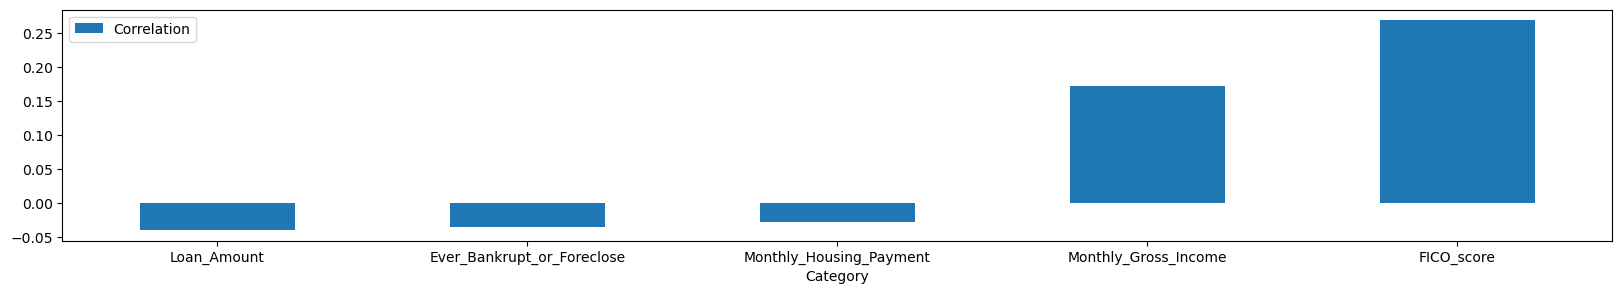

In [3]:
corrs = data.corrwith(data.Approved)
corrs = corrs.sort_values()
table = pandas.DataFrame(corrs).drop(labels=['bounty', 'Approved', 'applications']).reset_index()
table.columns = ['Category', 'Correlation']
display(table)
table.plot.bar(x = 'Category', y = 'Correlation', figsize = (20, 3), rot = 0)

In [4]:
approval_reason = data.groupby('Reason')['Approved'].mean()
tab_reason = pandas.DataFrame(approval_reason).reset_index()
tab_reason

approval_fico = data.groupby('Fico_Score_group')['Approved'].mean()
tab_fico = pandas.DataFrame(approval_fico).reset_index()

approval_emp_status = data.groupby('Employment_Status')['Approved'].mean()
tab_emp_status = pandas.DataFrame(approval_emp_status).reset_index()

approval_emp_sector = data.groupby('Employment_Sector')['Approved'].mean()
tab_emp_sector = pandas.DataFrame(approval_emp_sector).reset_index()

approval_lender = data.groupby('Lender')['Approved'].mean()
tab_lender = pandas.DataFrame(approval_lender).reset_index()
tab_lender

display(tab_reason)
display(tab_fico)
display(tab_emp_status)
display(tab_emp_sector)
display(tab_lender)

,Reason,Approved
0,cover_an_unexpected_cost,0.109307
1,credit_card_refinancing,0.112667
2,debt_conslidation,0.108935
3,home_improvement,0.109756
4,major_purchase,0.109530
5,other,0.108138


,Fico_Score_group,Approved
0,excellent,0.457952
1,fair,0.064373
2,good,0.180620
3,poor,0.027849
4,very_good,0.356527


,Employment_Status,Approved
0,full_time,0.120711
1,part_time,0.081224
2,unemployed,0.054948


,Employment_Sector,Approved
0,communication_services,0.095718
1,consumer_discretionary,0.084207
2,consumer_staples,0.096835
3,energy,0.106003
4,financials,0.132369
5,health_care,0.119729
6,industrials,0.117476
7,information_technology,0.122038
8,materials,0.108328
9,real_estate,0.114983


,Lender,Approved
0,A,0.109655
1,B,0.071273
2,C,0.170571


Based on my analysis, we can see that the FICO Score is the most helpful in predicting if a customer is going to be approved for a loan with a positive correlation of 0.27. The approval rates are significantly different between the various FICO score groups, which demonstrates that customers with "Excellent" and "Very Good" scores have a high approval rate. Employment Status and Employment Sector also have a strong impact in predicting loan approvals. A few variables that are not useful to collect are the loan reason, loan amount, and housing payments as these had low variability and weak correlations. Since FICO scores were the best predictor, I think that separating the groups into smaller subsets would provide even more meaningful insights as this allows us to determine a more precise range of scores that lead to the loan being approved. Moreover, I believe that combining the monthly gross income and loan amount could make these variables more useful as this would account for the risk of a customer paying back the loan. 

Question 2

,Category,Correlation
0,Ever_Bankrupt_or_Foreclose,-0.039489
1,Loan_Amount,-0.034692
2,Monthly_Housing_Payment,0.010163
3,Monthly_Gross_Income,0.185287
4,FICO_score,0.264852


<AxesSubplot: xlabel='Category'>

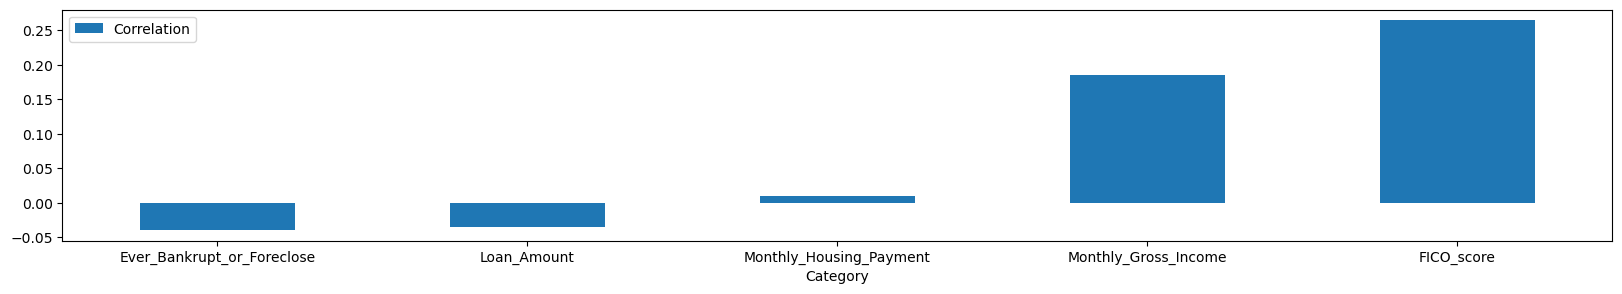

In [6]:
lender_A = data[data['Lender'] == 'A']
corrs_A = lender_A.corrwith(lender_A.Approved)
corrs_A = corrs_A.sort_values()
table_A = pandas.DataFrame(corrs_A).drop(labels=['bounty', 'Approved', 'applications']).reset_index()
table_A.columns = ['Category', 'Correlation']
display(table_A)
table_A.plot.bar(x = 'Category', y = 'Correlation', figsize = (20, 3), rot = 0)

,Category,Correlation
0,Loan_Amount,-0.033155
1,Ever_Bankrupt_or_Foreclose,-0.028599
2,Monthly_Housing_Payment,-0.015656
3,Monthly_Gross_Income,0.197259
4,FICO_score,0.316949


<AxesSubplot: xlabel='Category'>

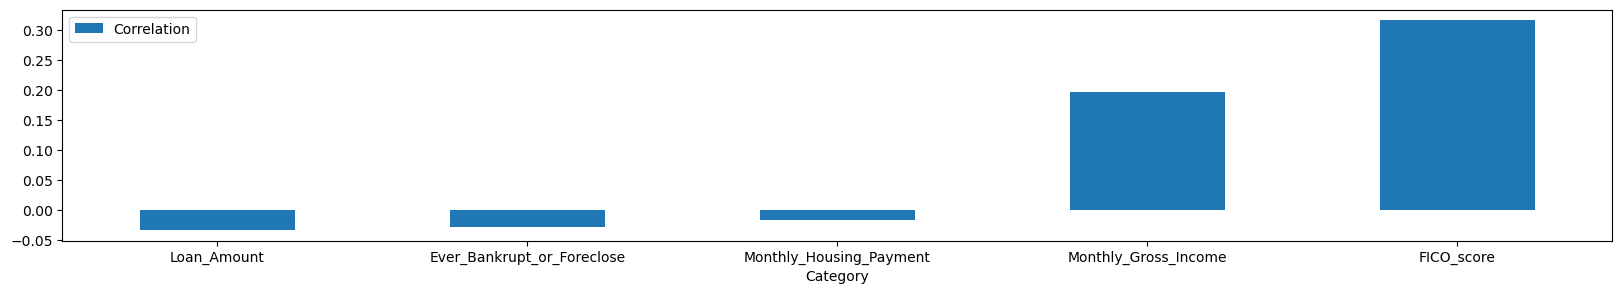

In [8]:
lender_B = data[data['Lender'] == 'B']
corrs_B = lender_B.corrwith(lender_B.Approved)
corrs_B = corrs_B.sort_values()
table_B = pandas.DataFrame(corrs_B).drop(labels=['bounty', 'Approved', 'applications']).reset_index()
table_B.columns = ['Category', 'Correlation']
display(table_B)
table_B.plot.bar(x = 'Category', y = 'Correlation', figsize = (20, 3), rot = 0)

,Category,Correlation
0,Loan_Amount,-0.063958
1,Ever_Bankrupt_or_Foreclose,-0.059775
2,Monthly_Housing_Payment,-0.058433
3,Monthly_Gross_Income,0.162265
4,FICO_score,0.257962


<AxesSubplot: xlabel='Category'>

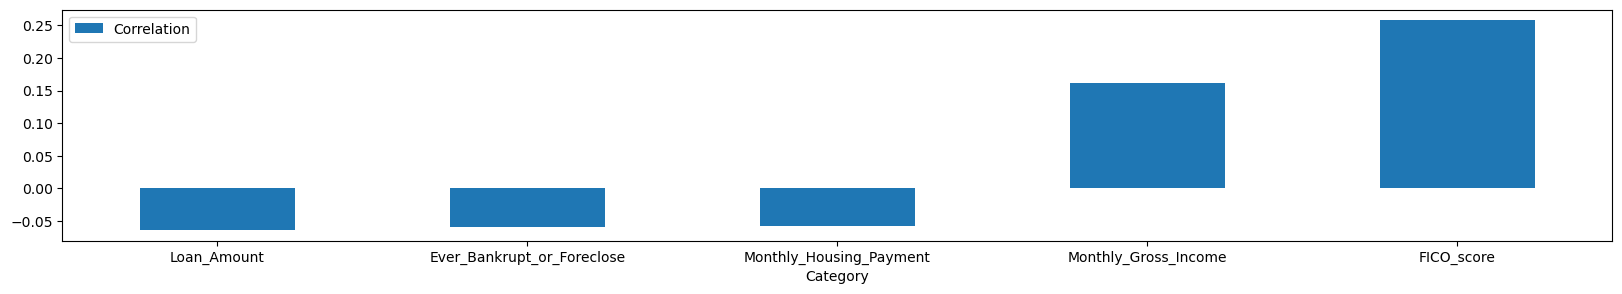

In [9]:
lender_C = data[data['Lender'] == 'C']
corrs_C = lender_C.corrwith(lender_C.Approved)
corrs_C = corrs_C.sort_values()
table_C = pandas.DataFrame(corrs_C).drop(labels=['bounty', 'Approved', 'applications']).reset_index()
table_C.columns = ['Category', 'Correlation']
display(table_C)
table_C.plot.bar(x = 'Category', y = 'Correlation', figsize = (20, 3), rot = 0)

In [10]:
approval_reason_A = lender_A.groupby('Reason')['Approved'].mean()
tab_reason_A = pandas.DataFrame(approval_reason_A).reset_index()
display(tab_reason_A)

approval_reason_B = lender_B.groupby('Reason')['Approved'].mean()
tab_reason_B = pandas.DataFrame(approval_reason_B).reset_index()
display(tab_reason_B)

approval_reason_C = lender_C.groupby('Reason')['Approved'].mean()
tab_reason_C = pandas.DataFrame(approval_reason_C).reset_index()
display(tab_reason_C)

,Reason,Approved
0,cover_an_unexpected_cost,0.110928
1,credit_card_refinancing,0.114700
2,debt_conslidation,0.105738
3,home_improvement,0.110269
4,major_purchase,0.108019
5,other,0.111509


,Reason,Approved
0,cover_an_unexpected_cost,0.067111
1,credit_card_refinancing,0.073135
2,debt_conslidation,0.070985
3,home_improvement,0.071177
4,major_purchase,0.073303
5,other,0.073576


,Reason,Approved
0,cover_an_unexpected_cost,0.168252
1,credit_card_refinancing,0.170598
2,debt_conslidation,0.178020
3,home_improvement,0.168506
4,major_purchase,0.171490
5,other,0.153303


In [11]:
approval_fico_A = lender_A.groupby('Fico_Score_group')['Approved'].mean()
tab_fico_A = pandas.DataFrame(approval_fico_A).reset_index()
display(tab_fico_A)

approval_fico_B = lender_B.groupby('Fico_Score_group')['Approved'].mean()
tab_fico_B = pandas.DataFrame(approval_fico_B).reset_index()
display(tab_fico_B)

approval_fico_C = lender_C.groupby('Fico_Score_group')['Approved'].mean()
tab_fico_C = pandas.DataFrame(approval_fico_C).reset_index()
display(tab_fico_C)

,Fico_Score_group,Approved
0,excellent,0.443697
1,fair,0.065689
2,good,0.179660
3,poor,0.026274
4,very_good,0.358491


,Fico_Score_group,Approved
0,excellent,0.433333
1,fair,0.015419
2,good,0.135946
3,poor,0.000000
4,very_good,0.297800


,Fico_Score_group,Approved
0,excellent,0.546196
1,fair,0.130186
2,good,0.260110
3,poor,0.075524
4,very_good,0.491803


In [12]:
approval_emp_status_A = lender_A.groupby('Employment_Status')['Approved'].mean()
tab_emp_status_A = pandas.DataFrame(approval_emp_status_A).reset_index()
display(tab_emp_status_A)

approval_emp_status_B = lender_B.groupby('Employment_Status')['Approved'].mean()
tab_emp_status_B = pandas.DataFrame(approval_emp_status_B).reset_index()
display(tab_emp_status_B)

approval_emp_status_C = lender_C.groupby('Employment_Status')['Approved'].mean()
tab_emp_status_C = pandas.DataFrame(approval_emp_status_C).reset_index()
display(tab_emp_status_C)

,Employment_Status,Approved
0,full_time,0.118802
1,part_time,0.070400
2,unemployed,0.097802


,Employment_Status,Approved
0,full_time,0.080056
1,part_time,0.049536
2,unemployed,0.013500


,Employment_Status,Approved
0,full_time,0.213762
1,part_time,0.144118
2,unemployed,0.067506


In [13]:
approval_emp_sector_A = lender_A.groupby('Employment_Sector')['Approved'].mean()
tab_emp_sector_A = pandas.DataFrame(approval_emp_sector_A).reset_index()
display(tab_emp_sector_A)

approval_emp_sector_B = lender_B.groupby('Employment_Sector')['Approved'].mean()
tab_emp_sector_B = pandas.DataFrame(approval_emp_sector_B).reset_index()
display(tab_emp_sector_B)

approval_emp_sector_C = lender_C.groupby('Employment_Sector')['Approved'].mean()
tab_emp_sector_C = pandas.DataFrame(approval_emp_sector_C).reset_index()
display(tab_emp_sector_C)

,Employment_Sector,Approved
0,communication_services,0.091669
1,consumer_discretionary,0.086045
2,consumer_staples,0.090768
3,energy,0.098131
4,financials,0.129844
5,health_care,0.111761
6,industrials,0.110833
7,information_technology,0.120947
8,materials,0.105979
9,real_estate,0.110697


,Employment_Sector,Approved
0,communication_services,0.054158
1,consumer_discretionary,0.041063
2,consumer_staples,0.065667
3,energy,0.064516
4,financials,0.094787
5,health_care,0.081169
6,industrials,0.083782
7,information_technology,0.085561
8,materials,0.072171
9,real_estate,0.073220


,Employment_Sector,Approved
0,communication_services,0.187375
1,consumer_discretionary,0.148221
2,consumer_staples,0.176211
3,energy,0.215385
4,financials,0.212188
5,health_care,0.222404
6,industrials,0.204626
7,information_technology,0.195003
8,materials,0.181996
9,real_estate,0.201508


,Lender,Approved
0,A,0.109655
1,B,0.071273
2,C,0.170571


<AxesSubplot: xlabel='Lender'>

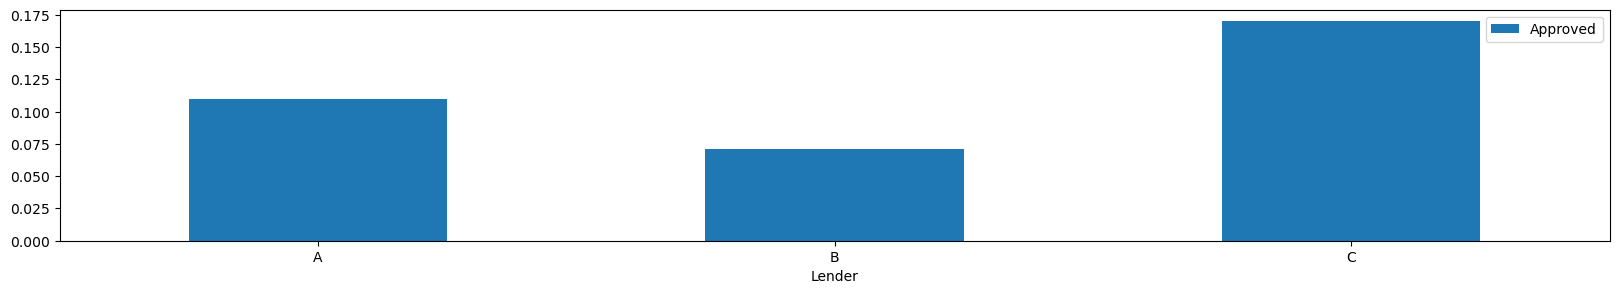

In [14]:
display(tab_lender)
tab_lender.plot.bar(x = 'Lender', y = 'Approved', figsize = (20, 3), rot = 0)

Given from this table that was created previously, we can see that lender A has an average approval rate of 10.97%, lender B has an average approval rate of 7.13%, and lender C has an average approval rate of 17.06%. The main difference between the lenders is their approval rate based on FICO scores. While all of the lenders approve customers with higher FICO scores, lender B has the lowest approval rates for customers in the poor group accepting 0%. lender A and C are more balanced, but lender A tends to approve more customers in the very good and good groups. The same trend can be seen with the employment status category as lender B has very low rates for part-time and unemployed employees. Lender A has much higher rates for full-time employees while lender C is relatively similar. Another key difference is that lender A is the only one that has a positive correlation with the monthly housing payment category. The FICO score and employment status variables most reliably predicted a customer's likelihood of being approved among all of the lenders.

Question 3

In [15]:
bounty_A = 250
bounty_B = 350
bounty_C = 150

match_data = data.copy()
match_data['Approval_Prob_A'] = match_data['Fico_Score_group'].map(approval_fico_A)
match_data['Approval_Prob_B'] = match_data['Fico_Score_group'].map(approval_fico_B)
match_data['Approval_Prob_C'] = match_data['Fico_Score_group'].map(approval_fico_C)
match_data['Expected_Rev_A'] = match_data['Approval_Prob_A'] * bounty_A
match_data['Expected_Rev_B'] = match_data['Approval_Prob_B'] * bounty_B
match_data['Expected_Rev_C'] = match_data['Approval_Prob_C'] * bounty_C
match_data['Best_Lender'] = match_data[['Expected_Rev_A', 'Expected_Rev_B', 'Expected_Rev_C']].idxmax(axis=1).str[-1]

match_data['Expected_Revenue'] = match_data.apply(lambda row: row['Expected_Rev_A'] if row['Lender'] == 'A' 
                                   else row['Expected_Rev_B'] if row['Lender'] == 'B' 
                                   else row['Expected_Rev_C'], axis=1)
match_data['New_Revenue'] = match_data.apply(lambda row: row['Expected_Rev_A'] if row['Best_Lender'] == 'A' 
                                   else row['Expected_Rev_B'] if row['Best_Lender'] == 'B' 
                                   else row['Expected_Rev_C'], axis=1)
incremental_revenue = match_data['New_Revenue'].sum() - match_data['Expected_Revenue'].sum()
print(incremental_revenue)
match_data

577841.1386676356


,User ID,applications,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,...,bounty,Approval_Prob_A,Approval_Prob_B,Approval_Prob_C,Expected_Rev_A,Expected_Rev_B,Expected_Rev_C,Best_Lender,Expected_Revenue,New_Revenue
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,...,0,0.065689,0.015419,0.130186,16.422145,5.396553,19.527897,C,5.396553,19.527897
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,...,0,0.065689,0.015419,0.130186,16.422145,5.396553,19.527897,C,5.396553,19.527897
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,...,0,0.065689,0.015419,0.130186,16.422145,5.396553,19.527897,C,16.422145,19.527897
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,642,fair,part_time,energy,3129,904,...,0,0.065689,0.015419,0.130186,16.422145,5.396553,19.527897,C,16.422145,19.527897
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,642,fair,full_time,energy,4220,1620,...,0,0.065689,0.015419,0.130186,16.422145,5.396553,19.527897,C,16.422145,19.527897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,fffb48e8-fc77-49fe-ab4e-e99a0829a788,1,other,40000,724,good,full_time,consumer_staples,5800,1460,...,0,0.179660,0.135946,0.260110,44.915042,47.581081,39.016544,B,44.915042,47.581081
99996,fffb63e2-b1d6-4d73-b766-44ba50203c00,1,major_purchase,70000,621,fair,full_time,consumer_staples,5691,2705,...,0,0.065689,0.015419,0.130186,16.422145,5.396553,19.527897,C,5.396553,19.527897
99997,fffba42b-265f-4269-a6d5-c8db7e3bd430,1,major_purchase,80000,345,poor,full_time,real_estate,3312,1210,...,0,0.026274,0.000000,0.075524,6.568433,0.000000,11.328588,C,11.328588,11.328588
99998,fffd8e45-d5f8-4b06-b1a4-2d4bf527ee51,1,debt_conslidation,90000,448,poor,full_time,industrials,4597,1420,...,0,0.026274,0.000000,0.075524,6.568433,0.000000,11.328588,C,11.328588,11.328588


As decribed earlier, I determined that the FICO score groups were the best predictors in the approval likelihood of a particular vendor. Therefore, I calculated the expected revenue from each application using the customer's approval probability based on their FICO group. Then, I calculated the expected revenue if they were matched to one of the other two lenders and determined which lender maximized the revenue for that application. Finally, I compared the total revenue that was generated by matching each application with the best lender to the orignal total revenue from which I determined the incremental revenue. By matching the lenders to customers based on their FICO score, we could make $577,841.14 more in revenue. If we wanted to match lenders with customers in real-time, we would need access to the customer's information such as their FICO Score Group. In addition, we would need a predictive model that determines the likelihood of the customer being approved for each lender based on their information. 